<a href="https://colab.research.google.com/github/Aurelien07/stackoverflowquestions/blob/main/Projet_5_Analyse_non_supervis%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import des libraires :

In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c955b48671690332f9e5661745e6f73f3f1b5e9d3ff80b8ce498ab7b86d3ee8c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=93f00347f1bb6edb6fe243321d42606fb1583cf0e378c9dbfd7e41f344f0ce68
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [5]:
import pandas as pd
import numpy as np
import IPython.display
import re

# Pour la visualisation graphique :
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px

# Pour supprimer les warnings :
import warnings
warnings.filterwarnings("ignore")

# Pour l'optimisation des algos :
from sklearn.model_selection import GridSearchCV

# Pour le BOW :
from nltk.tokenize import word_tokenize

# Pour le tf-idf :
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# pour les algorithmes supervisés :
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

# Pour les scores :
from sklearn import metrics
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss
from sklearn.metrics import roc_auc_score

# Pour la PCA : 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

# Pour la LDA : 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Pour la NMF :
from sklearn.decomposition import NMF

# Pour la visualisation des tokens :
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

# Pour pyLDAvis :
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_visualisation = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/TEST/p5_visualisation_part_1.pkl")

### Mise en place de la limite des 50 tags :

In [10]:
df_modellisation = df_visualisation[[
    'corpus_preprocessing', 'tags_preprocessing']]
df_modellisation

,corpus_preprocessing,tags_preprocessing
0,"[:allocator, construct, performance, lot]","[c++, std, c++20, allocator]"
1,"[cache, route, question, anything, site, regen...","[typescript, next.js, contentful]"
2,"[field, issue, text, scroll, view, line, selec...","[textfield, selection, flutter-web]"
3,"[closure, path, state, localsI, closure, path,...","[.net-core, closure]"
4,"[statement, consistency, Chapter, statement, c...","[java, java-memory-model, jls]"
...,...,...
152261,"[date, column, dd/mm/yy, hh, mm, hh, mm, ssI, ...","[panda, date, datetime]"
152262,"[iPhone, version, Xcode, error, device, way]","[io, iphone, xcode]"
152263,"[start, background, task, project, start, acti...","[android, android-architecture-components, and..."
152264,"[difference, install, question, anything, run,...","[javascript, node.js, npm, npm-install]"


In [11]:
df_modellisation['corpus_finish'] = df_modellisation['corpus_preprocessing'].apply(
    lambda x: " ".join(x))
df_modellisation['tags_finish'] = df_modellisation['tags_preprocessing'].apply(
    lambda x: " ".join(x))
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish
0,"[:allocator, construct, performance, lot]","[c++, std, c++20, allocator]",:allocator construct performance lot,c++ std c++20 allocator
1,"[cache, route, question, anything, site, regen...","[typescript, next.js, contentful]",cache route question anything site regeneratio...,typescript next.js contentful
2,"[field, issue, text, scroll, view, line, selec...","[textfield, selection, flutter-web]",field issue text scroll view line select text ...,textfield selection flutter-web
3,"[closure, path, state, localsI, closure, path,...","[.net-core, closure]",closure path state localsI closure path state ...,.net-core closure
4,"[statement, consistency, Chapter, statement, c...","[java, java-memory-model, jls]",statement consistency Chapter statement consis...,java java-memory-model jls
...,...,...,...,...
152261,"[date, column, dd/mm/yy, hh, mm, hh, mm, ssI, ...","[panda, date, datetime]",date column dd/mm/yy hh mm hh mm ssI dataframe...,panda date datetime
152262,"[iPhone, version, Xcode, error, device, way]","[io, iphone, xcode]",iPhone version Xcode error device way,io iphone xcode
152263,"[start, background, task, project, start, acti...","[android, android-architecture-components, and...",start background task project start action sta...,android android-architecture-components androi...
152264,"[difference, install, question, anything, run,...","[javascript, node.js, npm, npm-install]",difference install question anything run machi...,javascript node.js npm npm-install


In [12]:
from nltk import FreqDist

In [13]:
from collections import Counter
frequence = FreqDist(df_modellisation['tags_finish'].tolist())

# on stock un dictionnaire du nombre de tags que l'on souhaite garder
top_50 = dict(Counter(frequence).most_common(200))

top_50_tags = []
for key, value in top_50.items():
    top_50_tags.append(key)
# garder que les clefs

df_modellisation['tags_final'] = df_modellisation['tags_preprocessing'].apply(
    lambda x: [element for element in x if element in top_50_tags])

In [14]:
top_50_tags

['flutter',
 'flutter dart',
 '',
 'dart flutter',
 'typescript',
 'python',
 'python panda',
 'javascript',
 'c++',
 'angular',
 'javascript reactjs',
 'rust',
 'visual-studio-code',
 'reactjs',
 'raku',
 'react-native',
 'python panda dataframe',
 'python python-3.x',
 'reactjs material-ui',
 'android',
 'io swift swiftui',
 'kubernetes',
 'java',
 'docker',
 'swiftui',
 'flutter flutter-layout',
 'git',
 'swift swiftui',
 'angular typescript',
 'go',
 'kotlin',
 'reactjs react-hooks',
 'angular angular-material',
 'javascript reactjs react-hooks',
 'docker docker-compose',
 'julia',
 'html cs',
 'android android-jetpack-compose',
 'haskell',
 'dplyr',
 'reactjs typescript',
 'visual-studio-code vscode-settings',
 'python tensorflow kera',
 'ggplot2',
 'python tensorflow',
 'android kotlin',
 'android android-studio',
 'python numpy',
 'python django',
 'php laravel',
 'asp.net-core',
 'python matplotlib',
 'dart',
 'javascript typescript',
 'javascript html',
 'flutter dart flutter-

In [15]:
liste_index = []
for i, l in df_modellisation.iterrows():
    if len(l['tags_final']) == 0:
        liste_index.append(i)
print("Le nombre de lignes qui seront supprimés est de :", len(liste_index))
print("fLe nombre de ligne du dataframe avant suppression est de :",
      df_modellisation.shape[0])
df_modellisation.drop(liste_index, inplace=True)  # suppression de la liste
print("Le nombre de ligne du dataframe aprés suppression est de :",
      df_modellisation.shape[0])

Le nombre de lignes qui seront supprimés est de : 31518
fLe nombre de ligne du dataframe avant suppression est de : 152266
Le nombre de ligne du dataframe aprés suppression est de : 120748


### Pickle pour analyse supervisée :

In [74]:
pickle.dump(top_50_tags, open('/content/drive/My Drive/Colab Notebooks/TEST/top_50_tags.pkl', 'wb'))

In [73]:
pd.to_pickle(df_modellisation, "/content/drive/My Drive/Colab Notebooks/TEST/df_modellisation_part_1.pkl")

# Bag Of Words (BOW) :

### Pour les tags : 

In [19]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(df_modellisation['tags_finish'])
tags = df_modellisation['tags_finish'].to_list()

In [20]:
print("Nombres de questions :", tag_bow.shape[0])
print("Nombres de tags uniques :", tag_bow.shape[1])

Nombres de questions : 120748
Nombres de tags uniques : 16307


Visualisation des 10 premiers Tags :

In [21]:
tags_name = vectorizer.get_feature_names_out()
print("Visualisation des 10 premiers tags pour le BOW :", tags_name[:10])

Visualisation des 10 premiers tags pour le BOW : ['-10.0' '-3.0' '-4.0' '-6.0' '-7.0' '-7.1' '-7.2' '-7.3' '-8.0' '-9.0']


In [22]:
frequence = tag_bow.sum(axis=0).A1 # Equivalent to ravel
tag_dict = dict(zip(tags, frequence))

In [23]:
liste = []
for key, value in tag_dict.items():
  liste.append([key, value]) 

In [24]:
tag_counting = pd.DataFrame(liste, columns=['Tags', 'Counts'])
tag_counting

,Tags,Counts
0,c++ std c++20 allocator,3
1,typescript next.js contentful,4
2,.net-core closure,5
3,java java-memory-model jls,2
4,python,4
...,...,...
12237,python holoviews hvplot holoviz,4
12238,c++ code-generation calling-convention abi sta...,2
12239,python selenium selenium-webdriver xpath css-s...,1
12240,swift option-type combine swift-keypath,1


In [25]:
display(tag_counting.max())
display(tag_counting.min())

Tags      yaml terraform azure-pipelines
Counts                             18792
dtype: object

Tags       
Counts    1
dtype: object

### Visualisation des tags :

Text(0, 0.5, 'Fréquence')

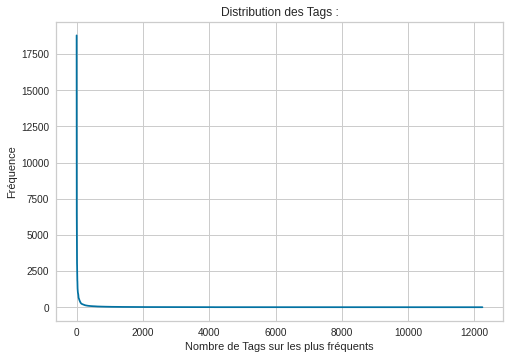

In [26]:
tag_counting_graph = tag_counting.sort_values(['Counts'], ascending=False)
plt.plot(tag_counting_graph['Counts'].values)
plt.grid(True)
plt.title("Distribution des Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

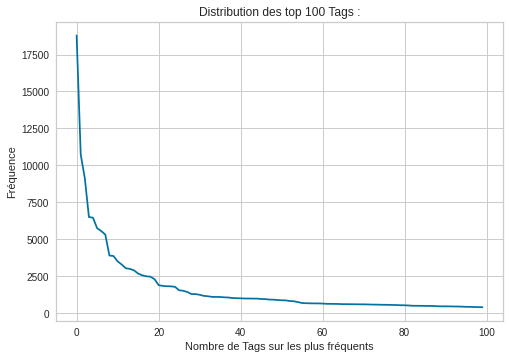

In [27]:
plt.plot(tag_counting_graph['Counts'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

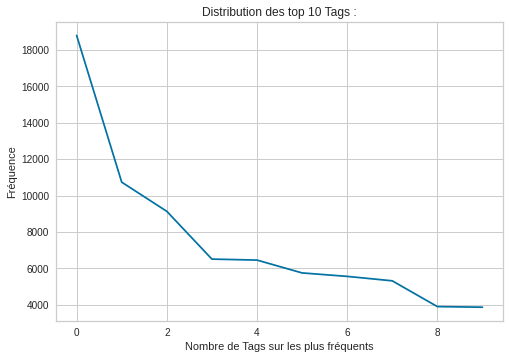

In [28]:
plt.plot(tag_counting_graph['Counts'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 Tags :")
plt.xlabel("Nombre de Tags sur les plus fréquents")
plt.ylabel("Fréquence")

On peut voir qu'à partir de 6 on commence à avoir une fréquence inférieur à 1000, on aurait donc tendance à garder 1000 en fréquence.

In [29]:
print("{} tags qui sont utilisés plus de 10 fois".format(tag_counting[tag_counting["Counts"]>10].shape[0]))
print("{} tags qui sont utilisés plus de 25 fois".format(tag_counting[tag_counting["Counts"]>25].shape[0]))
print("{} tags qui sont utilisés plus de 50 fois".format(tag_counting[tag_counting["Counts"]>50].shape[0]))
print("{} tags qui sont utilisés plus de 100 fois".format(tag_counting[tag_counting["Counts"]>100].shape[0]))
print("{} tags qui sont utilisés plus de 200 fois".format(tag_counting[tag_counting["Counts"]>200].shape[0]))
print("{} tags qui sont utilisés plus de 500 fois".format(tag_counting[tag_counting["Counts"]>500].shape[0]))

2334 tags qui sont utilisés plus de 10 fois
1146 tags qui sont utilisés plus de 25 fois
658 tags qui sont utilisés plus de 50 fois
343 tags qui sont utilisés plus de 100 fois
181 tags qui sont utilisés plus de 200 fois
82 tags qui sont utilisés plus de 500 fois


In [38]:
def bag_of_words(texts):
    data = texts
    cv = CountVectorizer(min_df=1000).fit(data)
    bow = cv.transform(data)


    data = pd.DataFrame({'count': bow.sum(axis=0).A1,
                         'word': cv.get_feature_names_out()
                         })
    data = data.sort_values(by=['count'], ascending=False)

    return (data, bow, cv)

### Création d'un DataFrame de visualisation + une matrice :

In [31]:
df_modellisation

,corpus_preprocessing,tags_preprocessing,corpus_finish,tags_finish,tags_final
0,"[:allocator, construct, performance, lot]","[c++, std, c++20, allocator]",:allocator construct performance lot,c++ std c++20 allocator,[c++]
1,"[cache, route, question, anything, site, regen...","[typescript, next.js, contentful]",cache route question anything site regeneratio...,typescript next.js contentful,"[typescript, next.js]"
3,"[closure, path, state, localsI, closure, path,...","[.net-core, closure]",closure path state localsI closure path state ...,.net-core closure,[.net-core]
4,"[statement, consistency, Chapter, statement, c...","[java, java-memory-model, jls]",statement consistency Chapter statement consis...,java java-memory-model jls,[java]
5,"[expression, work, expression, work, python, c...",[python],expression work expression work python case,python,[python]
...,...,...,...,...,...
152259,"[image, description, enter, image, description...","[reactjs, typescript, react-router-dom]",image description enter image description purp...,reactjs typescript react-router-dom,"[reactjs, typescript]"
152260,"[collection, mongoDB, program, method, documen...","[node.js, mongodb, mongoose, mongodb-query, ag...",collection mongoDB program method document doc...,node.js mongodb mongoose mongodb-query aggrega...,"[node.js, mongodb]"
152263,"[start, background, task, project, start, acti...","[android, android-architecture-components, and...",start background task project start action sta...,android android-architecture-components androi...,[android]
152264,"[difference, install, question, anything, run,...","[javascript, node.js, npm, npm-install]",difference install question anything run machi...,javascript node.js npm npm-install,"[javascript, node.js]"


In [39]:
%%time
data_bow,bow, cv = bag_of_words(df_modellisation["corpus_finish"])

CPU times: user 4.62 s, sys: 33.5 ms, total: 4.66 s
Wall time: 4.92 s


### Mise en pickle :

In [75]:
pickle.dump(bow, open('/content/drive/My Drive/Colab Notebooks/TEST/bow.pkl', 'wb'))

In [41]:
print("Nombres de questions pour le BOW:", bow.shape[0])
print("Nombres de tags uniques pour le BOW :", bow.shape[1])

Nombres de questions pour le BOW: 120748
Nombres de tags uniques pour le BOW : 302


#### Visualisation : 

data_bow[data_bow['count']<1000].sample(10) Utilisation de ce type de formule pour choisir l'optimum de mot.

In [35]:
data_bow

,count,word
39,46988,code
85,40296,error
296,32949,way
98,29403,file
106,23855,function
...,...,...
168,1182,multiple
230,1159,scenario
99,1132,fine
167,1129,moment


### Vectorisation :

In [42]:
%%time
data_bow_vec = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
data_bow_vec.index = df_modellisation.index

CPU times: user 107 ms, sys: 6.91 ms, total: 114 ms
Wall time: 114 ms


In [43]:
data_bow_vec

,access,account,action,add,address,advance,android,answer,anyone,anything,...,user,value,version,view,way,web,webpack,widget,window,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152263,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
152264,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
%%time
score_Sparsicity_bow = bow.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_bow > 0).sum()/score_Sparsicity_bow.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  2.66 %
CPU times: user 144 ms, sys: 209 ms, total: 353 ms
Wall time: 349 ms


Afficher la Sparsicity (sous forme de nombre ou de proportion) d'une matrice.

Par exemple, . 99% de  Sparsicity signifie que 99 % des valeurs sont nulles. De même, une Sparsicity de 0 signifie que la matrice est entièrement dense.

# TF-IDF :

La formule du tf-Idf est  : __poids = fréquence du terme * indicateur similarité__

__Pour extraire les informations on utilise :__

__NER (Named Entity Recognition) :__ reconnaître des personnes, endroits, entreprises, etc.

__Extraction de relations :__ essayer d'extraire des relations sémantiques entre différents termes du texte. Par exemple, des relations familiales ("Marie est l'enfant de Patrick") spatiales ("Le piano est devant la fenêtre"), etc. Ces informations peuvent ensuite être stockées dans une base de données relationnelles ou un graphe.

__Extraction d'événements :__ extraire des actions qui arrivent à nos entités. Par exemple "le cours de l'action X a augmenté de 5%" ou bien "le président à déclaré X dans son discours"

__POS Tagging (Part-of-Speech Tagging) :__ représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles

In [48]:
def Tfidf (texts) :
    data = texts
    tf = TfidfVectorizer(min_df = 1000).fit(data) # on choisit de prendre que les mots avec 200 itérations
    idf = tf.transform(texts)
    
    data = pd.DataFrame({'count': idf.sum(axis=0).A1,
                         'word': tf.get_feature_names_out()
                         })
    data = data.sort_values(by=['count'], ascending=False)
    data['count'] = round(data['count'])
    
    return(data,idf,tf)

### Création d'un DataFrame de visualisation + une matrice :

In [49]:
%%time
Data_idf,idf,tf = Tfidf(df_modellisation["corpus_finish"])

CPU times: user 4.56 s, sys: 19.6 ms, total: 4.58 s
Wall time: 5 s


In [50]:
print("Nombres de questions pour le TF-IDF :", idf.shape[0])
print("Nombres de tags uniques pour le TF-IDF :", idf.shape[1])

Nombres de questions pour le TF-IDF : 120748
Nombres de tags uniques pour le TF-IDF : 302


### Mise en pickle :

In [76]:
pickle.dump(idf, open('/content/drive/My Drive/Colab Notebooks/TEST/idf.pkl', 'wb'))

#### Visualisation : 

In [52]:
Data_idf

,count,word
39,6548.0,code
85,6445.0,error
296,5151.0,way
98,4573.0,file
106,4139.0,function
...,...,...
126,324.0,info
212,322.0,read
167,320.0,moment
159,305.0,matter


### Vectorisation :

In [53]:
data_tfidf_vec = pd.DataFrame(idf.toarray(), columns=cv.get_feature_names_out())
data_tfidf_vec.index = df_modellisation.index
data_tfidf_vec.head()

,access,account,action,add,address,advance,android,answer,anyone,anything,...,user,value,version,view,way,web,webpack,widget,window,work
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.197068,0.0,0.0,0.0,0.179853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437122


In [54]:
%%time
score_Sparsicity_tfidf = idf.todense()
print("Sparsicity: ", '\033[1m'+ str((((score_Sparsicity_tfidf > 0).sum()/score_Sparsicity_tfidf.size)*100).round(2)) + '\033[0m' , "%")

Sparsicity:  2.66 %
CPU times: user 142 ms, sys: 216 ms, total: 358 ms
Wall time: 359 ms


Afficher la Sparsicity (sous forme de nombre ou de proportion) d'une matrice.

Par exemple, . 99% de  Sparsicity signifie que 99 % des valeurs sont nulles. De même, une Sparsicity de 0 signifie que la matrice est entièrement dense.

On a donc 2.01% de données avec un 0 dans notre tf-idf.

# ACP :

Le code provient d'un cours d'OpenClassrooms.

In [55]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # Determine the limits of the chart
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # Display variable names
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # Display circle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)


def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig = plt.figure(figsize=(7, 6))

            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            # plt.show(block=False)


def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

In [56]:
# constitution du dataset pour l'ACP
df_acp = data_tfidf_vec

n_comp = 200
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

X = df_acp.values
features = df_acp.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

In [57]:
%%time
PCA_decomposition = decomposition.PCA(n_components=200)
PCA_decomposition.fit(X_scaled)

CPU times: user 21.1 s, sys: 2.35 s, total: 23.4 s
Wall time: 13 s


PCA(n_components=200)

In [58]:
print('\033[1m' + 'Le pourcentage de variance expliqué pour 200 composantes est de :' + '\033[0m')
print('')
print((PCA_decomposition.explained_variance_ratio_)*100)
print('')
print(f"Le pourcentage de variance expliqué cumulé pour 200 composantes est de :",
      '\033[1m' + str(round((PCA_decomposition.explained_variance_ratio_.sum())*100, 2)) + '\033[0m', '%')

Le pourcentage de variance expliqué pour 200 composantes est de :

[0.80272655 0.63572466 0.58103176 0.56847583 0.54826871 0.52305058
 0.50691978 0.4959329  0.48590224 0.47328656 0.45525753 0.44524307
 0.44327128 0.44051009 0.43403156 0.42814548 0.42210562 0.41881971
 0.41824407 0.41223188 0.40913283 0.40446051 0.4020408  0.3980916
 0.39529794 0.39414445 0.39127007 0.39037553 0.38846659 0.38683173
 0.38465268 0.38265582 0.3819189  0.38104164 0.37626374 0.37550416
 0.37315679 0.37258832 0.37118879 0.37060106 0.36872164 0.36553855
 0.3649295  0.36346236 0.3627201  0.36096846 0.36011877 0.35970006
 0.35828395 0.35769752 0.35755463 0.35677204 0.35531016 0.35372795
 0.35323    0.35226911 0.35156436 0.3507163  0.35009652 0.34949311
 0.34895082 0.34846099 0.34770057 0.34709572 0.34656659 0.34613052
 0.34588591 0.34475304 0.34429364 0.34370757 0.3434568  0.3431825
 0.34259865 0.34238797 0.3414124  0.34120863 0.34039727 0.34019457
 0.33985999 0.33902744 0.33854631 0.33833584 0.3380237  0.337455

In [59]:
print('\033[1m' + 'Le pourcentage de variance expliqué pour 20 composantes est de :' + '\033[0m')
print('')
print((PCA_decomposition.explained_variance_ratio_)*100)
print('')
print(f"Le pourcentage de variance expliqué cumulé pour 20 composantes est de :",
      '\033[1m' + str(round((PCA_decomposition.explained_variance_ratio_.sum())*100, 2)) + '\033[0m', '%')

Le pourcentage de variance expliqué pour 20 composantes est de :

[0.80272655 0.63572466 0.58103176 0.56847583 0.54826871 0.52305058
 0.50691978 0.4959329  0.48590224 0.47328656 0.45525753 0.44524307
 0.44327128 0.44051009 0.43403156 0.42814548 0.42210562 0.41881971
 0.41824407 0.41223188 0.40913283 0.40446051 0.4020408  0.3980916
 0.39529794 0.39414445 0.39127007 0.39037553 0.38846659 0.38683173
 0.38465268 0.38265582 0.3819189  0.38104164 0.37626374 0.37550416
 0.37315679 0.37258832 0.37118879 0.37060106 0.36872164 0.36553855
 0.3649295  0.36346236 0.3627201  0.36096846 0.36011877 0.35970006
 0.35828395 0.35769752 0.35755463 0.35677204 0.35531016 0.35372795
 0.35323    0.35226911 0.35156436 0.3507163  0.35009652 0.34949311
 0.34895082 0.34846099 0.34770057 0.34709572 0.34656659 0.34613052
 0.34588591 0.34475304 0.34429364 0.34370757 0.3434568  0.3431825
 0.34259865 0.34238797 0.3414124  0.34120863 0.34039727 0.34019457
 0.33985999 0.33902744 0.33854631 0.33833584 0.3380237  0.3374554

### Visualisation des dimensions :

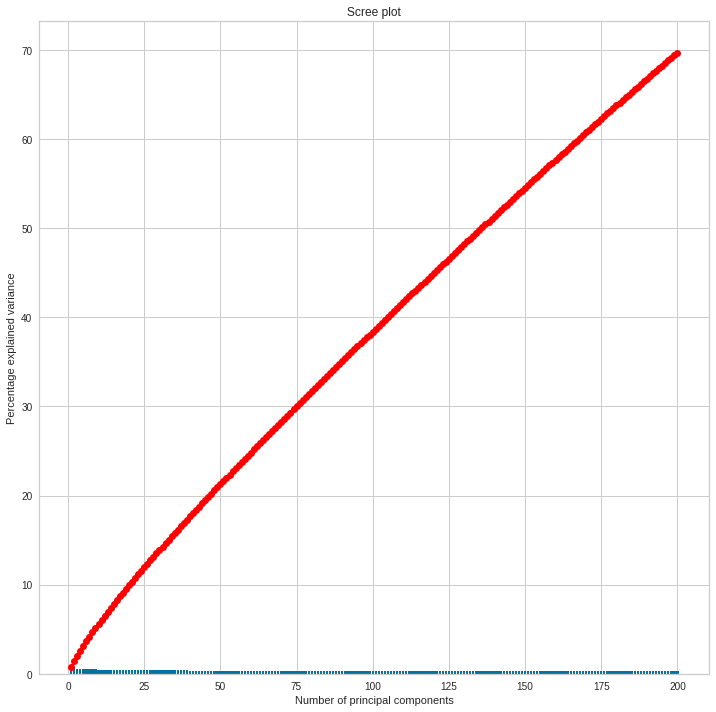

In [61]:
plt.figure(figsize=(12, 12))
display_scree_plot(pca)

On peut voir qu'au fur et à mesure cela réduit, mais que le pourcentage de variance expliquée est relativement faible..

### Cercle de corrélation :

### Vectorisation de la PC1 et PC2 :

<Figure size 1440x1440 with 0 Axes>

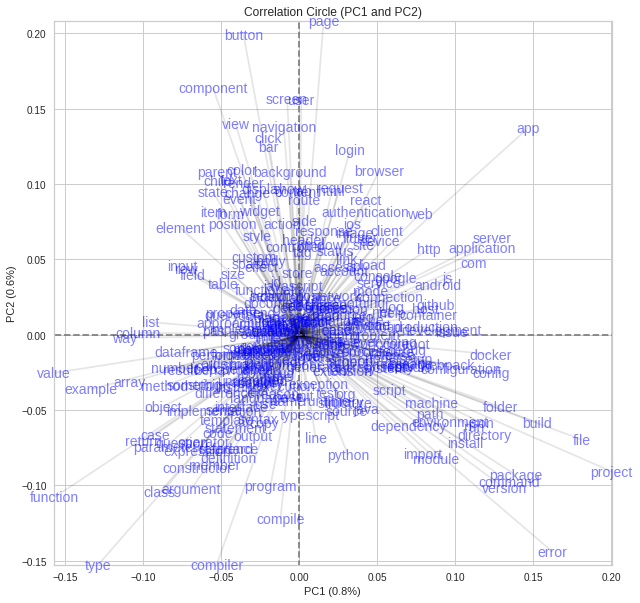

In [62]:
plt.figure(figsize=(20, 20))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

On peut voir ici que la PCA n'est pas pertinente, de ce fait on ne retiendra pas l'acp.

# LDA :

source : https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

Hypothése de la LDA à confirmer :

    - Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words)
    
    - Chaque document n'aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm)

    - Chaque mot possède une distribution associée à chaque thème p(ϕk)
    
    - Zn représente le thème du mot Wn


La LDA est surtout optimisée pour le BOW, on utilisera donc pas le tf-idf ici.

#### Création d'un dictionnaire :

In [63]:
#creating a dictionary

gensim_dictionary = corpora.Dictionary(df_modellisation["corpus_preprocessing"])

# corpus 
texts = df_modellisation["corpus_preprocessing"]

# building a corpus for the topic model

gensim_corpus = [gensim_dictionary.doc2bow(text) for text in texts]

#### Visualisation du corpus et de sa fréquence :

In [64]:
#printing the corpus we created above.

print(gensim_corpus[:3]) 

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1)], [(15, 3), (25, 2), (26, 1), (27, 1), (28, 2)]]


In [65]:
#we can print the words with their frequencies.

[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in gensim_corpus[:4]] 

[[(':allocator', 1), ('construct', 1), ('lot', 1), ('performance', 1)],
 [('advance', 1),
  ('anything', 1),
  ('cache', 2),
  ('cause', 1),
  ('code', 1),
  ('configuration', 1),
  ('example', 1),
  ('handler', 1),
  ('headless', 1),
  ('integration', 1),
  ('page', 1),
  ('path', 1),
  ('process', 1),
  ('question', 2),
  ('regeneration', 1),
  ('request', 1),
  ('restart', 1),
  ('route', 2),
  ('setup', 1),
  ('site', 1),
  ('time', 1)],
 [('path', 3), ('closure', 2), ('localsI', 1), ('point', 1), ('state', 2)],
 [('code', 3),
  ('Chapter', 1),
  ('bite', 1),
  ('conflict', 1),
  ('consistency', 5),
  ('contain', 1),
  ('everything', 1),
  ('field', 2),
  ('happens-before', 2),
  ('indentation', 1),
  ('order', 1),
  ('output', 3),
  ('problem', 1),
  ('program', 7),
  ('race', 2),
  ('read', 1),
  ('relationship', 2),
  ('result', 1),
  ('runtime', 1),
  ('something', 1),
  ('statement', 4),
  ('synchronized-with', 1),
  ('v2', 1),
  ('write', 1)]]

### Recherche de topics optimum :

In [ ]:
%%time
# stock result of coherence and perplexity score
results =[]

# loop for find the best topic :
for n_topics in [7, 8, 9, 10, 11, 12, 13, 14, 15]:
    
    # creating the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                                id2word=gensim_dictionary,
                                                num_topics=n_topics,
                                                random_state=0,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto'
                                               )

    # creation score :
    Perplexity_Score = lda_model.log_perplexity(gensim_corpus)
    Coherence_Score = CoherenceModel(model=lda_model,
                                     texts=texts,
                                     dictionary=gensim_dictionary,
                                     coherence='c_v'
                                     ).get_coherence()
    
    # Visualize the results :
    print('-'*40)
    print(f" For {n_topics} topics :")
    print('-'*40)
    print('')

    # Compute Perplexity
    print(f"Perplexity Score : {Perplexity_Score}") # a measure of how good the model is. lower the better.
    print('')
    
    # Compute Coherence Score
    print(f"Coherence Score : {Coherence_Score}")
    
    results.append([n_topics, Perplexity_Score, Coherence_Score])
# CPU times: user 1h 7min 56s, sys: 3min 11s, total: 1h 11min 8s
# Wall time: 1h 12min 9s

----------------------------------------
 For 7 topics :
----------------------------------------

Perplexity Score : -7.678008230817603

Coherence Score : 0.4065419467612494
----------------------------------------
 For 8 topics :
----------------------------------------

Perplexity Score : -7.755547629400943

Coherence Score : 0.43065933250747934
----------------------------------------
 For 9 topics :
----------------------------------------

Perplexity Score : -7.865962470496705

Coherence Score : 0.42655653565496965
----------------------------------------
 For 10 topics :
----------------------------------------

Perplexity Score : -8.026246597618286

Coherence Score : 0.4034523916046787
----------------------------------------
 For 11 topics :
----------------------------------------

Perplexity Score : -8.254231098726589

Coherence Score : 0.406277169959171
----------------------------------------
 For 12 topics :
----------------------------------------

Perplexity Score : -8.

#### Graphique d'optimisation du choix des topics :

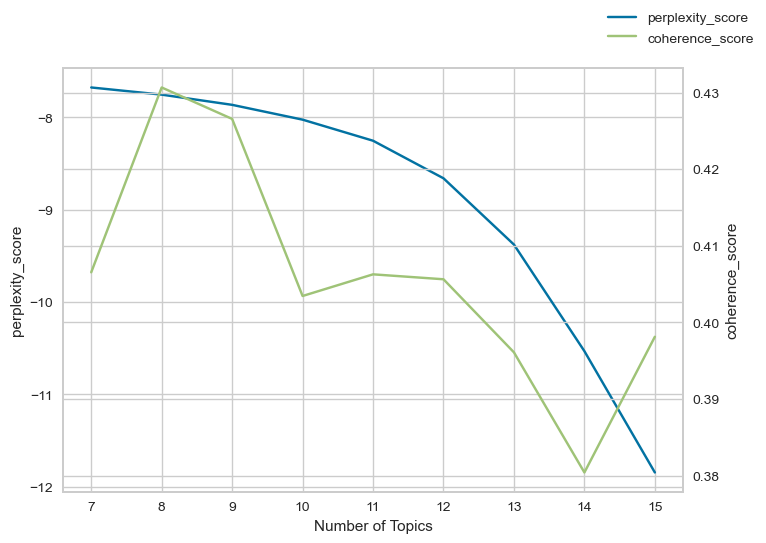

In [ ]:
fig,ax= plt.subplots()

# 1st line :
ax.plot([line[0] for line in results],
        [line[1] for line in results],
        color = "b",
        label = 'perplexity_score')
ax.set_ylabel('perplexity_score')
ax.set_xlabel('Number of Topics')


# to have same size for score :
ax2 = ax.twinx()

# 2nd line :
ax2.plot([line[0] for line in results],
        [line[2] for line in results],
        color = "g",
        label = 'coherence_score')
ax2.set_ylabel('coherence_score')

fig.legend()

On a confirmation que le nombre de LDA est 7.

#### Sauvegarde pickle des résultats globaux :

In [ ]:
topic_lda = pickle.dump(results, open('topic_lda.pkl', 'wb')) # pour le save
# results = pickle.load(open('topic_lda.pkl', 'rb')) # pour le load

## LDA optimisé par topic :

### Création du modéle de LDA avec le nombre de topics opti :

In [66]:
%%time

# creating the LDA model
lda_model_v2 = gensim.models.ldamodel_v2.LdaModel(corpus=gensim_corpus,
                                               id2word=gensim_dictionary,
                                               num_topics=8,
                                               random_state=0,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

# creation score :
Perplexity_Score = lda_model_v2.log_perplexity(gensim_corpus)
Coherence_Score = CoherenceModel(model=lda_model,
                                 texts=texts,
                                 dictionary=gensim_dictionary,
                                 coherence='c_v'
                                ).get_coherence()
    
# Compute Perplexity
print(f"Perplexity Score : {Perplexity_Score}") # a measure of how good the model is. lower the better.
print('')
    
# Compute Coherence Score
print(f"Coherence Score : {Coherence_Score}")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin ins

NameError: ignored

#### Visualization of Topics :

In [67]:
for idx, topic in lda_model_v2.show_topics(formatted=False, num_words=10):
    print(" \033[1m Topic: {} \033[0m:\n \nWords:\n {} ".format(
        idx, ' | '.join([w[0] for w in topic])))

  Topic: 0 :
 
Words:
 way | function | example | class | something | value | type | method | question | case 
  Topic: 1 :
 
Words:
 time | issue | line | help | list | result | anything | model | option | state 
  Topic: 2 :
 
Words:
 column | service | documentation | custom | field | input | difference | exception | log | load 
  Topic: 3 :
 
Words:
 code | use | problem | work | version | output | solution | component | http | test 
  Topic: 4 :
 
Words:
 error | file | project | image | app | command | access | server | database | container 
  Topic: 5 :
 
Words:
 application | page | change | request | user | button | size | text | response | date 
  Topic: 6 :
 
Words:
 script | python | check | structure | context | stream | style | click | box | effect 
  Topic: 7 :
 
Words:
 array | property | view | memory | header | template | parent | screen | position | device 


### Visualization Pyldavis :

In [68]:
%%time
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model_v2, gensim_corpus, gensim_dictionary)
LDAvis_prepared

CPU times: user 10.4 s, sys: 519 ms, total: 10.9 s
Wall time: 15.2 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.235612  0.358328       1        1  22.031533
0      0.317500 -0.278788       2        1  21.023219
4     -0.021346 -0.048879       3        1  15.000256
1     -0.084923 -0.014124       4        1  12.695769
5     -0.108964  0.000736       5        1   9.512773
2     -0.114328 -0.002571       6        1   7.287326
7     -0.109845 -0.010262       7        1   7.074034
6     -0.113705 -0.004440       8        1   5.375089, topic_info=          Term          Freq         Total Category  logprob  loglift
8         code  45383.000000  45383.000000  Default  30.0000  30.0000
63       error  32940.000000  32940.000000  Default  29.0000  29.0000
94        file  29405.000000  29405.000000  Default  28.0000  28.0000
60         way  34209.000000  34209.000000  Default  27.0000  27.0000
154   function  22105.000000  22105.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1042    export    673.639487    674.500905   Topic8  -5.0975   2.9221
526      topic    672.188521    673.050525   Topic8  -5.0997   2.9221
308     border    664.949295    665.810990   Topic8  -5.1105   2.9221
1567    gradle    663.575161    664.437435   Topic8  -5.1126   2.9221
509    capture    658.362955    659.224600   Topic8  -5.1204   2.9221

[273 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
165       3  0.999915    access
217       2  0.999589    action
379       6  0.999230  activity
942       3  0.999564   address
4         1  0.999846   advance
...     ...       ...       ...
77        8  0.999287    widget
342       3  0.999431    window
707       7  0.999487      word
55        1  0.999979      work
1824      8  0.998877       zip

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 6, 3, 8, 7])

In [71]:
visu_ = pickle.dump(LDAvis_prepared, open('/content/drive/My Drive/Colab Notebooks/TEST/LDAvis.pkl', 'wb')) # pour le save
# results = pickle.load(open('/content/drive/My Drive/Colab Notebooks/TEST/LDAvis.pkl', 'rb')) # pour le load

#### Sauvegarde pickle des résultats :

In [72]:
lda_model_v2_pkl = pickle.dump(lda_model_v2, open('/content/drive/My Drive/Colab Notebooks/TEST/topic_lda_v2.pkl', 'wb')) # pour le save
# lda_model = pickle.load(open('topic_lda_v2.pkl', 'rb')) # pour le load

# NMF :

En algèbre linéaire et en analyse à plusieurs variables, la factorisation matricielle non négative est un groupe d’algorithmes qui permet de factoriser une matrice V en deux matrices (W et H) qui ne contiennent que des valeurs positives ou nulles et dont le produit est proche de V.

source : https://datafranca.org/wiki/Factorisation_matricielle_non_négative

source : https://predictivehacks.com/topic-modelling-with-nmf-in-python/

source : https://notebook.community/piskvorky/gensim/docs/notebooks/nmf_tutorial

In [ ]:
from gensim.models import CoherenceModel, LdaModel, TfidfModel
from gensim.models.basemodel import BaseTopicModel
from gensim.models.nmf import Nmf as GensimNmf
from gensim.parsing.preprocessing import preprocess_string
import gensim.downloader
from gensim import matutils, utils
from gensim.corpora import Dictionary

In [ ]:
"""%%time
X = idf 
results_nmf = []
# loop for find the best topic :
for n_topics in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    # Create an NMF instance: model
    # the 10 components will be the topics
    nmf_model = NMF(n_components=n_topics, random_state=0)
    
     
    # Fit the model to TF-IDF
    model.fit(X)
 
    # Transform the TF-IDF: nmf_features
    nmf_features = model.transform(X)
    
    coherence_Score = CoherenceModel(model=nmf_model,
                                     texts=nmf_features,
                                     dictionary=dictionary,
                                     coherence='c_v'
                                     ).get_coherence()"""

In [ ]:
"""%%time
# stock result of coherence and perplexity score
results_nmf = []

# loop for find the best topic :
for n_topics in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:

    # creating the LDA model
    nmf_model = GensimNmf(corpus=idf,
                          num_topics=n_topics,
                          id2word=dictionary,
                          chunksize=1000,
                          passes=5,
                          eval_every=10,
                          minimum_probability=0,
                          random_state=0,
                          kappa=1,
                         )

    # creation score :
    Coherence_Score = CoherenceModel(model=nmf_model,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v'
                                     ).get_coherence()

    # Visualize the results :
    print('-'*40)
    print(f" For {n_topics} topic :")
    print('-'*40)
    print('')

    # Compute Coherence Score
    print(f"Coherence Score : {Coherence_Score}")

    results_nmf.append([n_topics, Coherence_Score])"""